In [159]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Update this with the correct file path
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

In [155]:
print('症例数は')
print(len(data))
print('うち帝王切開=Trueの内訳は')
print(data['mode_section'].value_counts())

症例数は
11792
うち帝王切開=Trueの内訳は
mode_section
False    8137
True     3655
Name: count, dtype: int64


In [160]:
indications = ['既往筋腫核出、骨盤位', '既往帝切、胎児機能不全', '両股関節唇損傷手術既往', '既往帝切、前期破水', '双胎', 
               '常位胎盤早期剥離疑い', '既往子宮筋腫手術', '母体合併症（脳動脈瘤）', '子宮角部妊娠術後のため', 
               'HDP、低置胎盤、高齢', '子宮内胎児発育遅延', 'PIH、胎児胎盤機能不全、骨盤位', '低置胎盤、軟産道強靭', 
               '骨盤位、HDP', '胎児機能不全（FGR）', 'IUGR', 'FGR', '子宮筋腫合併', '胎盤早期剥離の疑い', '既往帝王切開', 
               '胎盤早期剥離', '子宮筋腫合併妊娠', '産道感染（外陰部ヘルペス）', '既往筋腫核出、既往帝王切開', '既往帝切、PIH', 
               '骨盤位、前期破水、陣痛発来', 'PIH／低位胎盤', 'ミオーム合併', '既往帝切、骨盤位', '臍帯辺縁付着、高齢初産', 
               'コンジローマ', 'ヘルペス治療後', '外陰ヘルペス', '既往子宮手術', '低位胎盤', '子宮頸部筋腫合併', 
               '既往帝切、陣痛発来', '前置', '低置胎盤', '早剥疑い', '骨盤位', '骨盤位.腹痛.出血', '胎位', 
               '前回分娩時Ⅳ度裂傷にて', 'ラパロ手術歴あり', '既往帝切、HDP ', '早期胎盤剥離疑い', '前置胎盤', 
               '前回早剥、本人希望', '既往帝切、BEL', '既往帝切、PIH', '子宮内膜症ope後', '既往筋腫核出、低置胎盤', 
               '骨盤位、子宮筋腫合併', '常位胎盤早期剥離', 'ミオメク後', 'PIH、羊水過症、FGR', '既往筋腫核出', '既往帝切、陣発', 
               '既往帝切', 'BEL', '筋腫核出術後', '骨盤位、FGR', '横位', '低地胎盤', '外陰部ヘルペス', 'コンジローマ感染', 
               '子宮筋腫術後', '既往帝切、切迫早産', '足位', '重複子宮', '希望']

In [161]:
data = data[~data['cs_reason'].isin(indications)]

#incompatible_with_LEA = ['既往帝切、胎児機能不全', '胎児機能不全、回旋異常', '胎児機能不全、', '胎児機能不全、母体発熱', 
#                         'CPD、胎児胎盤機能低下', '停止、胎児機能不全', 'CPD、児心音低下', 'PIH、胎児胎盤機能不全、骨盤位', 
#                         '胎児機能不全、CPD', '子宮内感染の疑い', '胎児機能不全、軟産道強靭', '胎児機能不全、分娩停止', 
#                         '胎児機能不全（FGR）', '胎児機能不全', '子宮内感染', '分娩停止', 'NRFS', 'CPD、分娩停止、胎児機能不全', 
#                         'PIH、胎児機能不全', '胎児機能不全、児頭骨盤不均衡', '回旋異常、胎児機能不全', '胎児機能不全、CPD', 
#                         'CPD、NRFS', 'PIH、NRFS ', 'CPD、回旋異常、胎児胎盤機能不全', '胎児機能不全、FGR', '胎児機能不全(FGR)', 
#                         '胎児胎盤機能不全', 'PIH、NRFS ', '胎児機能不全、子宮筋腫核出後', '胎児機能不全、回旋異常、HDP', 
#                         'CPD、胎児機能不全', '胎児機能不全、PIH']

#data = data[~data['cs_reason'].isin(incompatible_with_LEA)]

data = data.dropna(subset=['labor_time'])
data['labor_time'] = pd.to_datetime(data['labor_time'].astype(str).str.split().str[-1]).dt.time
data['delivery_time'] = pd.to_datetime(data['delivery_time'].astype(str).str.split().str[-1]).dt.time
data['labor'] = pd.to_datetime(data['labor_date'].astype(str) + ' ' + data['labor_time'].astype(str))
data['delivery'] = pd.to_datetime(data['delivery_date'].astype(str) + ' ' + data['delivery_time'].astype(str))
data['duration'] = (data['delivery'] - data['labor']).dt.total_seconds() / 3600
data['イベント'] = (data['mode_section'] == 1).astype(int)
data['打ち切り'] = (data['mode_section'] == 0).astype(int)

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\544487325.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['labor_time'] = pd.to_datetime(data['labor_time'].astype(str).str.split().str[-1]).dt.time
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\544487325.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['delivery_time'] = pd.to_datetime(data['delivery_time'].astype(str).str.split().str[-1]).dt.time


In [122]:
print('症例数は')
print(len(data))
print('うち帝王切開=Trueの内訳は')
print(data['mode_section'].value_counts())

症例数は
10054
うち帝王切開=Trueの内訳は
mode_section
False    8133
True     1921
Name: count, dtype: int64


In [123]:
data_on_demand = data[data['labor_date'] >= '2018-08-01']

print('症例数は')
print(len(data_on_demand))
print('うち帝王切開=Trueの内訳は')
print(data_on_demand['mode_section'].value_counts())

症例数は
5008
うち帝王切開=Trueの内訳は
mode_section
False    4010
True      998
Name: count, dtype: int64


In [151]:
# Replace values in the 'analgesia' column
data['fertility'] = data['fertility'].replace({'その他': 0, 'AIH': 1, 'ART': 2})
data['mode'] = data['mode'].replace({'経腟分娩': 0, '吸引分娩': 1, '帝王切開': 2})

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\2166509533.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fertility'] = data['fertility'].replace({'その他': 0, 'AIH': 1, 'ART': 2})
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\2166509533.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['mode'] = data['mode'].replace({'経腟分娩': 0, '吸引分娩': 1, '帝王切開': 2})


In [125]:
data['mode'].value_counts()

mode
0    6822
2    1921
1    1311
Name: count, dtype: int64

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\296803382.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = data.set_index('delivery')[numeric_columns].resample('M').mean()


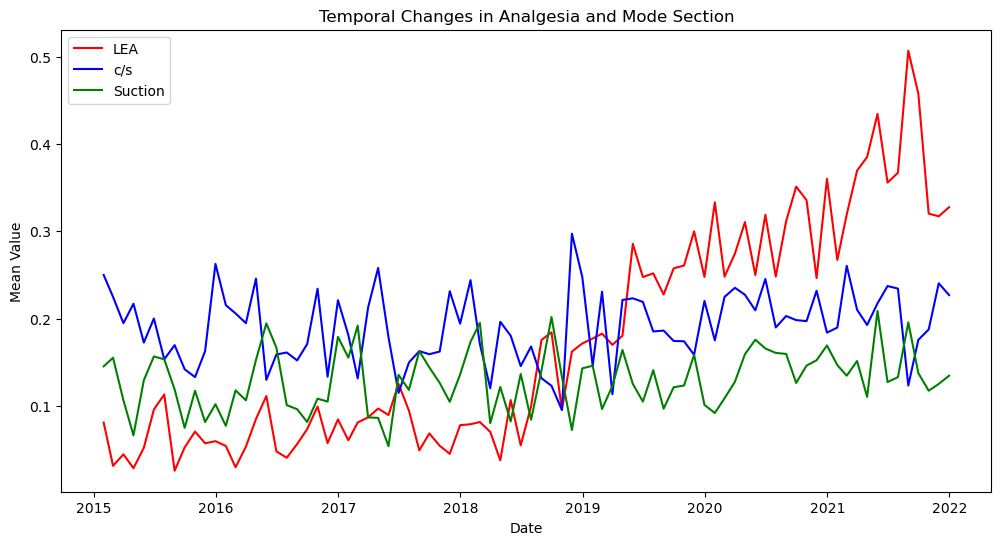

In [126]:
# Resample the data on a monthly basis and calculate the mean for numeric columns only
numeric_columns = ['duration', 'analgesia', 'mode_section', 'mode_suction']  # Specify the numeric columns relevant for resampling
monthly_means = data.set_index('delivery')[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
# Plot 'analgesia'
plt.plot(monthly_means.index, monthly_means['analgesia'], color='red', label='LEA')
# Plot 'ECS'
plt.plot(monthly_means.index, monthly_means['mode_section'], color='blue', label='c/s')
# Plot 'Suction'
plt.plot(monthly_means.index, monthly_means['mode_suction'], color='green', label='Suction')

plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Temporal Changes in Analgesia and Mode Section')
plt.legend()
plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\4194788370.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = data.set_index('delivery')[numeric_columns].resample('M').mean()


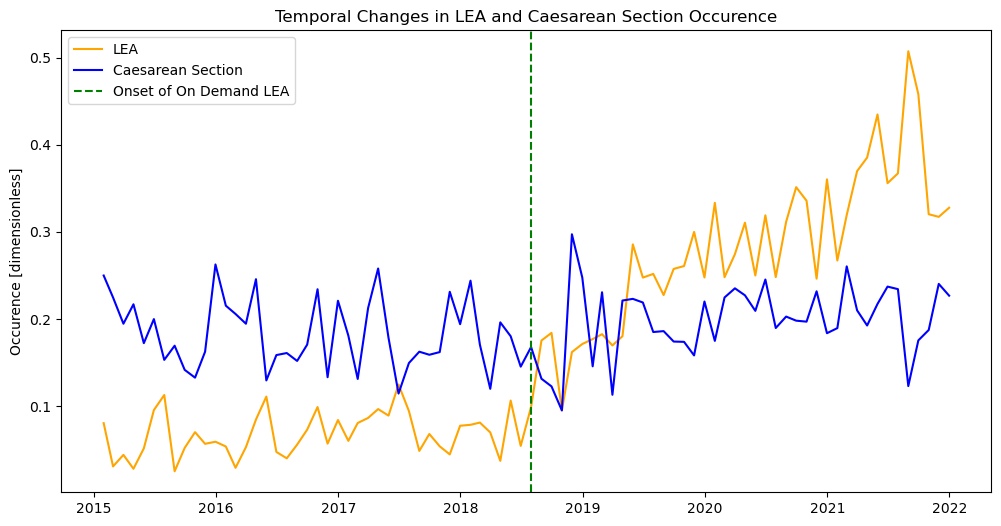

In [127]:
# Resample the data on a monthly basis and calculate the mean for numeric columns only
numeric_columns = ['duration', 'analgesia', 'mode_section']  # Specify the numeric columns relevant for resampling
monthly_means = data.set_index('delivery')[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
# Plot 'analgesia'
plt.plot(monthly_means.index, monthly_means['analgesia'], color='orange', label='LEA')
# Plot 'ECS'
plt.plot(monthly_means.index, monthly_means['mode_section'], color='blue', label='Caesarean Section')
# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')  # Add vertical line

plt.xlabel('')
plt.ylabel('Occurence [dimensionless]')
plt.title('Temporal Changes in LEA and Caesarean Section Occurence')
plt.legend()
plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\27688899.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_null = df_null['mode_section'].resample('M').mean()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\27688899.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_multi = df_multi['mode_section'].resample('M').mean()


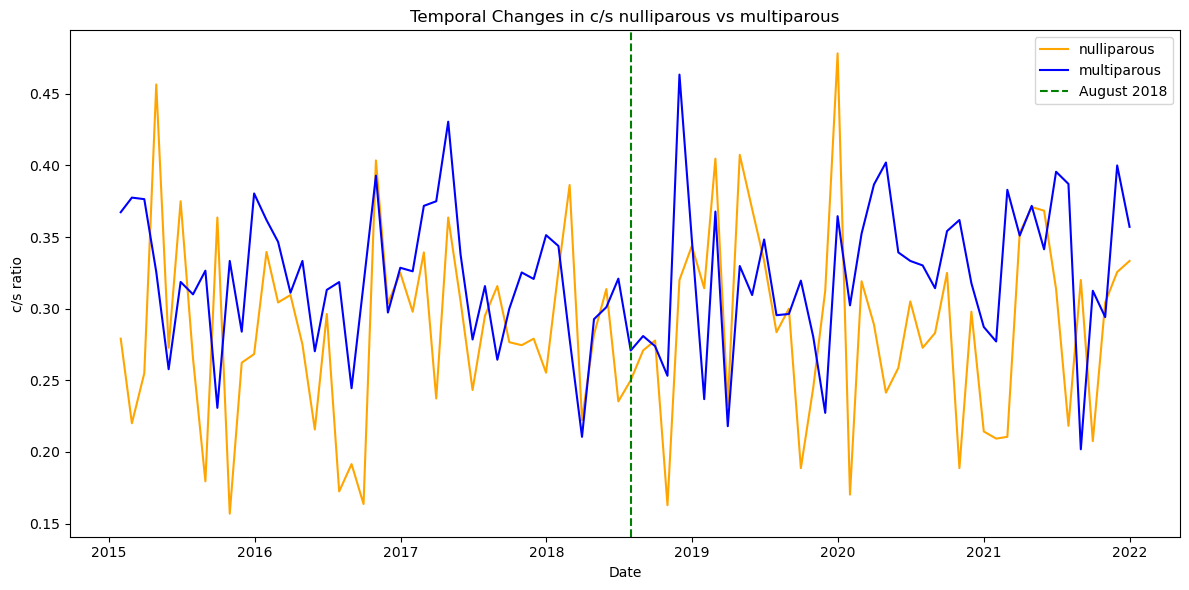

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロードと処理
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data['null'] = 1 * (data['P'] == 1)
data['delivery'] = pd.to_datetime(data['delivery_date'])  # 適切に日付に変換
data.set_index('delivery', inplace=True)

# 分析対象データの抽出
df_null = data[data['null'] == 1]
df_multi = data[data['null'] == 0]

# 月単位のデータ集約
monthly_means_null = df_null['mode_section'].resample('M').mean()
monthly_means_multi = df_multi['mode_section'].resample('M').mean()

# 線形モデルの適用
# Nulliparous
X_null = sm.add_constant(np.arange(len(monthly_means_null)))
model_null = sm.OLS(monthly_means_null.values, X_null)
results_null = model_null.fit()
fitted_null = results_null.predict(X_null)

# Multiparous
X_multi = sm.add_constant(np.arange(len(monthly_means_multi)))
model_multi = sm.OLS(monthly_means_multi.values, X_multi)
results_multi = model_multi.fit()
fitted_multi = results_multi.predict(X_multi)

# Plotting code
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(monthly_means_null.index, monthly_means_null, color='orange', label='nulliparous')
ax.plot(monthly_means_multi.index, monthly_means_multi, color='blue', label='multiparous')
#ax.plot(monthly_means_null.index, fitted_null, 'r--', label='Fitted nulliparous')  # Fitted line for nulliparous
#ax.plot(monthly_means_multi.index, fitted_multi, 'b--', label='Fitted multiparous')  # Fitted line for multiparous

# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='August 2018')  # Add vertical line

ax.set_xlabel('Date')
ax.set_ylabel('c/s ratio')
ax.set_title('Temporal Changes in c/s nulliparous vs multiparous')
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1336152806.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_lea_1 = df_lea_1[numeric_columns].resample('M', on='delivery').mean()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1336152806.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_lea_0 = df_lea_0[numeric_columns].resample('M', on='delivery').mean()


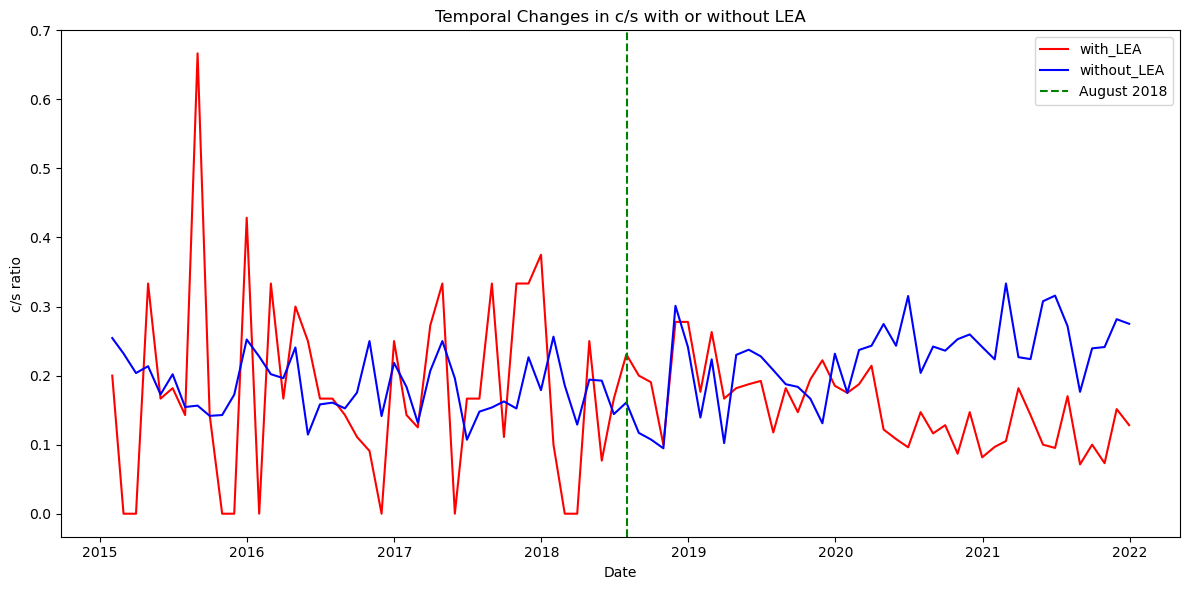

In [139]:
# Continue with your analysis
df_lea_1 = data[data['analgesia'] == 1]
df_lea_0 = data[data['analgesia'] == 0]

numeric_columns = ['delivery', 'mode_section']  # Assuming this is a numeric column

monthly_means_lea_1 = df_lea_1[numeric_columns].resample('M', on='delivery').mean()
monthly_means_lea_0 = df_lea_0[numeric_columns].resample('M', on='delivery').mean()

# Plotting code
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(monthly_means_lea_1.index, monthly_means_lea_1['mode_section'], color='red', label='with_LEA')
ax.plot(monthly_means_lea_0.index, monthly_means_lea_0['mode_section'], color='blue', label='without_LEA')

# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='August 2018')  # Add vertical line

ax.set_xlabel('Date')
ax.set_ylabel('c/s ratio')
ax.set_title('Temporal Changes in c/s with or without LEA')
ax.legend()
plt.tight_layout()
plt.show()


In [140]:
import numpy as np

# Calculate the sizes of both groups
size_lea_1 = len(df_lea_1)
size_lea_0 = len(df_lea_0)

# Calculate the proportions of 'ECS' = 1 in both groups
proportion_lea_1 = df_lea_1['mode_section'].mean()
proportion_lea_0 = df_lea_0['mode_section'].mean()

# Calculate the standard errors on the proportions
std_err_lea_1 = np.sqrt((proportion_lea_1 * (1 - proportion_lea_1)) / size_lea_1)
std_err_lea_0 = np.sqrt((proportion_lea_0 * (1 - proportion_lea_0)) / size_lea_0)

# Calculate the 95% confidence intervals
conf_int_lea_1 = [proportion_lea_1 - 1.96*std_err_lea_1, proportion_lea_1 + 1.96*std_err_lea_1]
conf_int_lea_0 = [proportion_lea_0 - 1.96*std_err_lea_0, proportion_lea_0 + 1.96*std_err_lea_0]

# Perform a two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest
count = np.array([df_lea_1['mode_section'].sum(), df_lea_0['mode_section'].sum()])
nobs = np.array([size_lea_1, size_lea_0])
z_stat, p_val = proportions_ztest(count, nobs)

proportion_lea_1 = round(proportion_lea_1, 2)
proportion_lea_0 = round(proportion_lea_0, 2)
conf_int_lea_1 = [round(i, 2) for i in conf_int_lea_1]
conf_int_lea_0 = [round(i, 2) for i in conf_int_lea_0]
p_val = round(p_val, 2)

proportion_lea_1, conf_int_lea_1, proportion_lea_0, conf_int_lea_0, p_val

(0.15, [0.13, 0.16], 0.2, [0.19, 0.21], 0.0)

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\2321650388.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_null = df_null[numeric_columns].resample('M', on='delivery').mean()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\2321650388.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_multi = df_multi[numeric_columns].resample('M', on='delivery').mean()


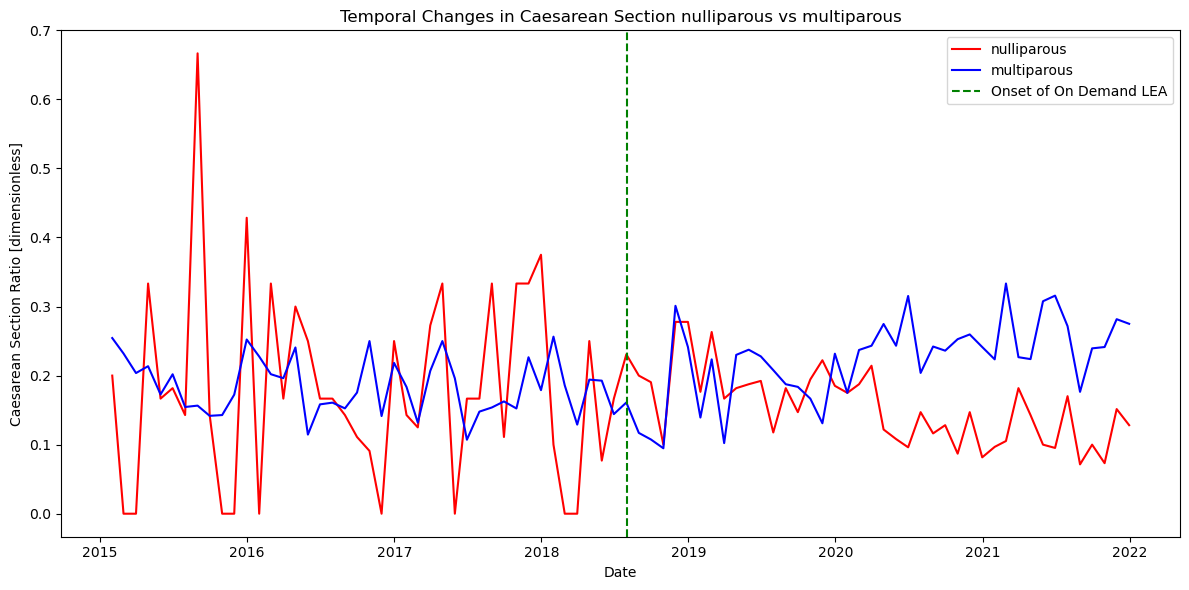

In [141]:
data['null'] = 1*(data['P']==1)

# Continue with your analysis
df_null = data[data['null'] == 1]
df_multi = data[data['null'] == 0]

numeric_columns = ['delivery', 'mode_section']  # Assuming this is a numeric column

monthly_means_null = df_null[numeric_columns].resample('M', on='delivery').mean()
monthly_means_multi = df_multi[numeric_columns].resample('M', on='delivery').mean()

# Plotting code
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(monthly_means_null.index, monthly_means_null['mode_section'], color='red', label='nulliparous')
ax.plot(monthly_means_multi.index, monthly_means_multi['mode_section'], color='blue', label='multiparous')

# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')  # Add vertical line

ax.set_xlabel('Date')
ax.set_ylabel('Caesarean Section Ratio [dimensionless]')
ax.set_title('Temporal Changes in Caesarean Section nulliparous vs multiparous')
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1895671919.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_null = data[data['null'] == 1]['mode_section'].resample('M').mean()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1895671919.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_multi = data[data['null'] == 0]['mode_section'].resample('M').mean()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1895671919.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_lea = data['analgesia'].resample('M').mean()


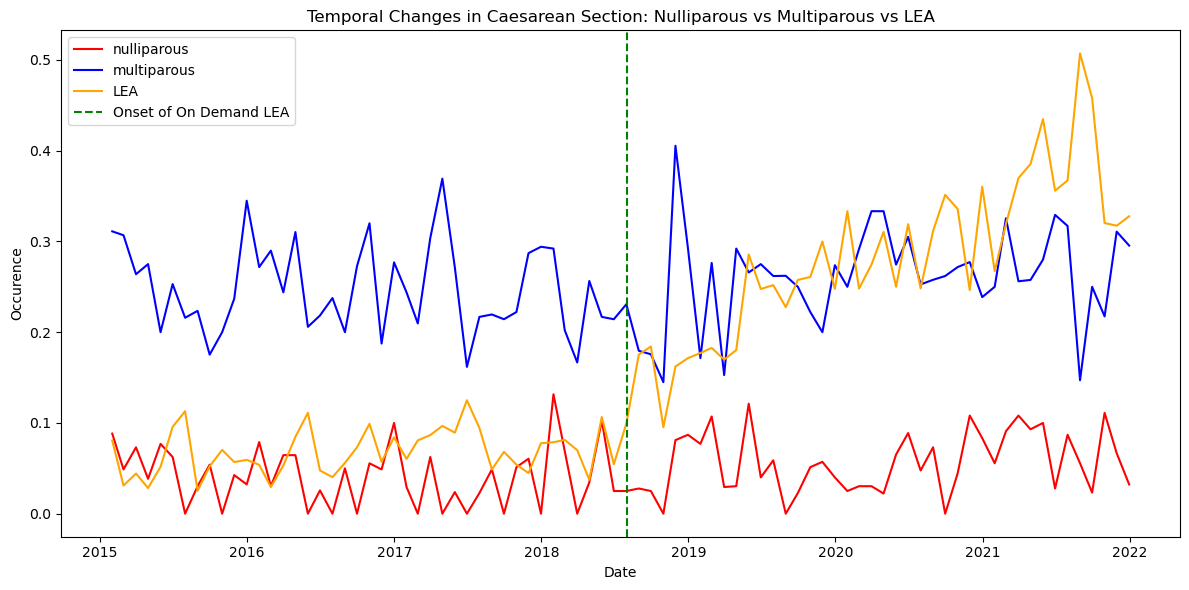

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

indications = ['既往筋腫核出、骨盤位', '既往帝切、胎児機能不全', '両股関節唇損傷手術既往', '既往帝切、前期破水', '双胎', 
               '常位胎盤早期剥離疑い', '既往子宮筋腫手術', '母体合併症（脳動脈瘤）', '子宮角部妊娠術後のため', 
               'HDP、低置胎盤、高齢', '子宮内胎児発育遅延', 'PIH、胎児胎盤機能不全、骨盤位', '低置胎盤、軟産道強靭', 
               '骨盤位、HDP', '胎児機能不全（FGR）', 'IUGR', 'FGR', '子宮筋腫合併', '胎盤早期剥離の疑い', '既往帝王切開', 
               '胎盤早期剥離', '子宮筋腫合併妊娠', '産道感染（外陰部ヘルペス）', '既往筋腫核出、既往帝王切開', '既往帝切、PIH', 
               '骨盤位、前期破水、陣痛発来', 'PIH／低位胎盤', 'ミオーム合併', '既往帝切、骨盤位', '臍帯辺縁付着、高齢初産', 
               'コンジローマ', 'ヘルペス治療後', '外陰ヘルペス', '既往子宮手術', '低位胎盤', '子宮頸部筋腫合併', 
               '既往帝切、陣痛発来', '前置', '低置胎盤', '早剥疑い', '骨盤位', '骨盤位.腹痛.出血', '胎位', 
               '前回分娩時Ⅳ度裂傷にて', 'ラパロ手術歴あり', '既往帝切、HDP ', '早期胎盤剥離疑い', '前置胎盤', 
               '前回早剥、本人希望', '既往帝切、BEL', '既往帝切、PIH', '子宮内膜症ope後', '既往筋腫核出、低置胎盤', 
               '骨盤位、子宮筋腫合併', '常位胎盤早期剥離', 'ミオメク後', 'PIH、羊水過症、FGR', '既往筋腫核出', '既往帝切、陣発', 
               '既往帝切', 'BEL', '筋腫核出術後', '骨盤位、FGR', '横位', '低地胎盤', '外陰部ヘルペス', 'コンジローマ感染', 
               '子宮筋腫術後', '既往帝切、切迫早産', '足位', '重複子宮', '希望']

data = data[~data['cs_reason'].isin(indications)]

# 'P'が1の場合をnulliparous、それ以外をmultiparousとして、新しいカラムにフラグを設定
data['null'] = (data['P'] == 1).astype(int)

# 日付カラムをdatetime型に変換してインデックスに設定
data['delivery'] = pd.to_datetime(data['delivery_date'])
data.set_index('delivery', inplace=True)

# それぞれのグループについて月単位で平均を計算
monthly_means_null = data[data['null'] == 1]['mode_section'].resample('M').mean()
monthly_means_multi = data[data['null'] == 0]['mode_section'].resample('M').mean()
monthly_means_lea = data['analgesia'].resample('M').mean()

# グラフ描画
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_means_null.index, monthly_means_null, color='red', label='nulliparous')
ax.plot(monthly_means_multi.index, monthly_means_multi, color='blue', label='multiparous')
ax.plot(monthly_means_lea.index, monthly_means_lea, color='orange', label='LEA')

# ondemand LEAの開始日に線を引く
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')

# ラベルとタイトルの設定
ax.set_xlabel('Date')
ax.set_ylabel('Occurence')
ax.set_title('Temporal Changes in Caesarean Section: Nulliparous vs Multiparous vs LEA')
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1161799680.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_null = data[data['null'] == 1]['mode_section'].resample('M').mean().reset_index()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1161799680.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_multi = data[data['null'] == 0]['mode_section'].resample('M').mean().reset_index()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1161799680.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_lea = data['analgesia'].resample('M').mean().reset_index()


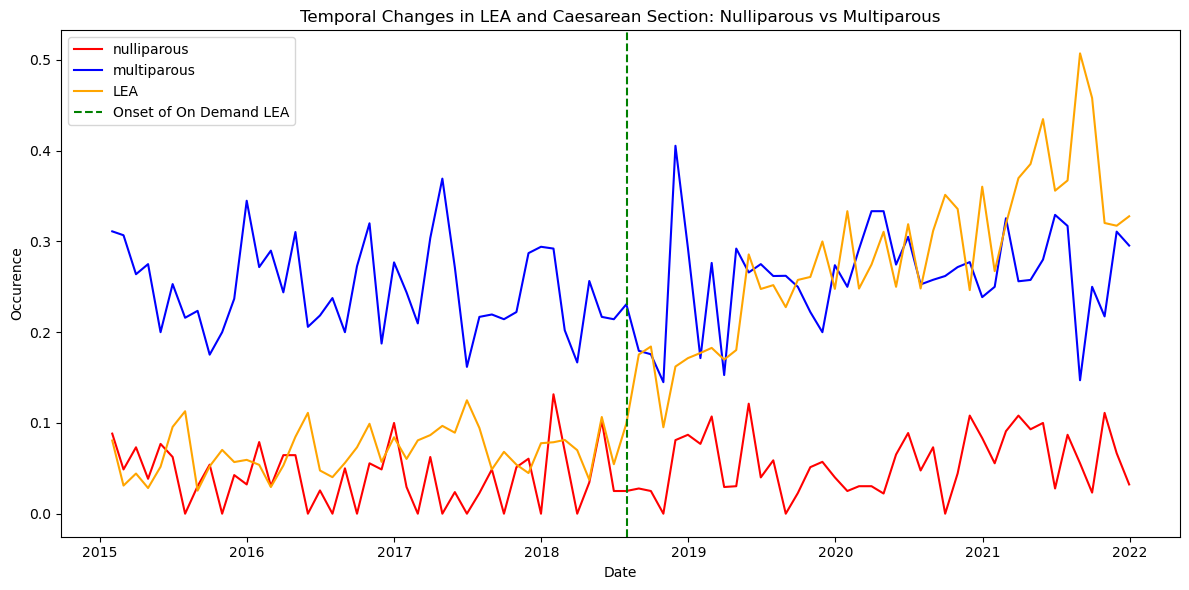

Nulliparous Model Summary:
                            OLS Regression Results                            
Dep. Variable:           mode_section   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     4.816
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0310
Time:                        23:43:52   Log-Likelihood:                 167.50
No. Observations:                  84   AIC:                            -331.0
Df Residuals:                      82   BIC:                            -326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 指定された帝王切開理由を除外
indications = ['既往筋腫核出、骨盤位', '既往帝切、胎児機能不全', '両股関節唇損傷手術既往', '既往帝切、前期破水', '双胎', 
               '常位胎盤早期剥離疑い', '既往子宮筋腫手術', '母体合併症（脳動脈瘤）', '子宮角部妊娠術後のため', 
               'HDP、低置胎盤、高齢', '子宮内胎児発育遅延', 'PIH、胎児胎盤機能不全、骨盤位', '低置胎盤、軟産道強靭', 
               '骨盤位、HDP', '胎児機能不全（FGR）', 'IUGR', 'FGR', '子宮筋腫合併', '胎盤早期剥離の疑い', '既往帝王切開', 
               '胎盤早期剥離', '子宮筋腫合併妊娠', '産道感染（外陰部ヘルペス）', '既往筋腫核出、既往帝王切開', '既往帝切、PIH', 
               '骨盤位、前期破水、陣痛発来', 'PIH／低位胎盤', 'ミオーム合併', '既往帝切、骨盤位', '臍帯辺縁付着、高齢初産', 
               'コンジローマ', 'ヘルペス治療後', '外陰ヘルペス', '既往子宮手術', '低位胎盤', '子宮頸部筋腫合併', 
               '既往帝切、陣痛発来', '前置', '低置胎盤', '早剥疑い', '骨盤位', '骨盤位.腹痛.出血', '胎位', 
               '前回分娩時Ⅳ度裂傷にて', 'ラパロ手術歴あり', '既往帝切、HDP ', '早期胎盤剥離疑い', '前置胎盤', 
               '前回早剥、本人希望', '既往帝切、BEL', '既往帝切、PIH', '子宮内膜症ope後', '既往筋腫核出、低置胎盤', 
               '骨盤位、子宮筋腫合併', '常位胎盤早期剥離', 'ミオメク後', 'PIH、羊水過症、FGR', '既往筋腫核出', '既往帝切、陣発', 
               '既往帝切', 'BEL', '筋腫核出術後', '骨盤位、FGR', '横位', '低地胎盤', '外陰部ヘルペス', 'コンジローマ感染', 
               '子宮筋腫術後', '既往帝切、切迫早産', '足位', '重複子宮', '希望']

data = data[~data['cs_reason'].isin(indications)]

# 'P'が1の場合をnulliparous、それ以外をmultiparousとして、新しいカラムにフラグを設定
data['null'] = (data['P'] == 1).astype(int)
data['lea'] = (data['analgesia'] == 1).astype(int)

# 日付カラムをdatetime型に変換してインデックスに設定
data['delivery'] = pd.to_datetime(data['delivery_date'])
data.set_index('delivery', inplace=True)

# それぞれのグループについて月単位で平均を計算
monthly_means_null = data[data['null'] == 1]['mode_section'].resample('M').mean().reset_index()
monthly_means_multi = data[data['null'] == 0]['mode_section'].resample('M').mean().reset_index()
monthly_means_lea = data['analgesia'].resample('M').mean().reset_index()

# 介入フラグの追加（LEAは含めず）
monthly_means_null['post_intervention'] = (monthly_means_null['delivery'] > pd.Timestamp('2018-08-01')).astype(int)
monthly_means_multi['post_intervention'] = (monthly_means_multi['delivery'] > pd.Timestamp('2018-08-01')).astype(int)

# nulliparousとmultiparousのそれぞれで回帰分析
model_null = ols('mode_section ~ post_intervention', data=monthly_means_null).fit()
model_multi = ols('mode_section ~ post_intervention', data=monthly_means_multi).fit()

# グラフ描画
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_means_null['delivery'], monthly_means_null['mode_section'], color='red', label='nulliparous')
ax.plot(monthly_means_multi['delivery'], monthly_means_multi['mode_section'], color='blue', label='multiparous')
ax.plot(monthly_means_lea['delivery'], monthly_means_lea['analgesia'], color='orange', label='LEA')

# ondemand LEAの開始日に線を引く
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')

# ラベルとタイトルの設定
ax.set_xlabel('Date')
ax.set_ylabel('Occurence')
ax.set_title('Temporal Changes in LEA and Caesarean Section: Nulliparous vs Multiparous')
ax.legend()

plt.tight_layout()
plt.show()

# 回帰分析の結果表示
print("Nulliparous Model Summary:")
print(model_null.summary())
print("\nMultiparous Model Summary:")
print(model_multi.summary())

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1407017939.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = data.groupby(['null', pd.Grouper(freq='M')])['mode_section'].mean().reset_index()
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\1407017939.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subset_lea = data['analgesia'].resample('M').mean().reset_index()


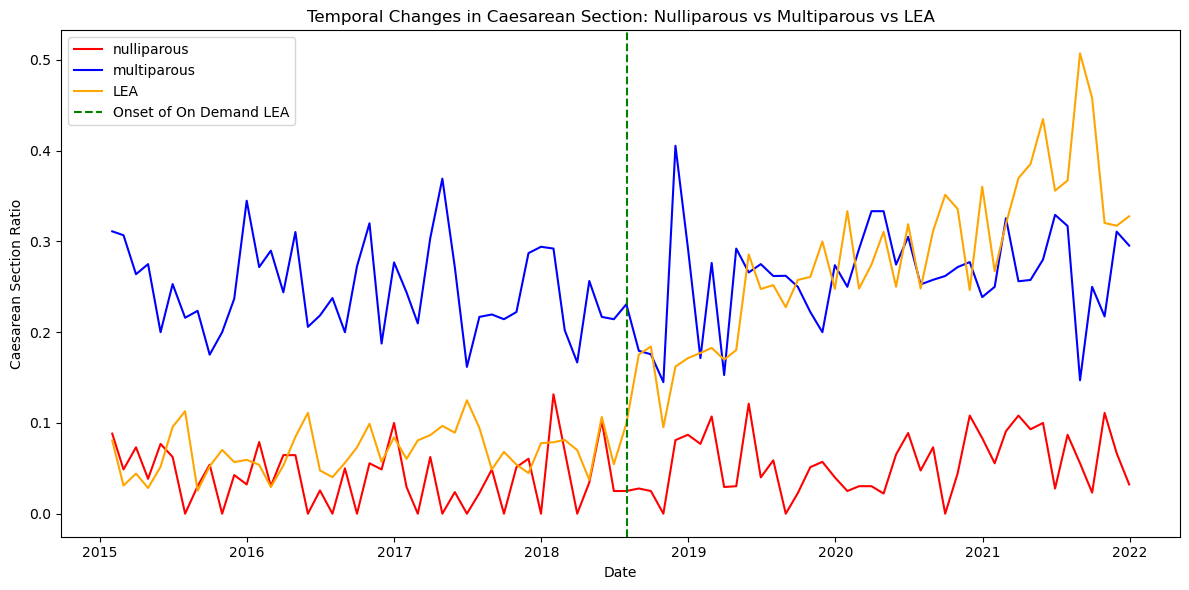

Nulliparous Model Summary:
                            OLS Regression Results                            
Dep. Variable:           mode_section   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.551
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0333
Time:                        23:51:43   Log-Likelihood:                 168.63
No. Observations:                  84   AIC:                            -331.3
Df Residuals:                      81   BIC:                            -324.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')

# 指定された帝王切開理由を除外
# 指定された帝王切開理由を除外
indications = ['既往筋腫核出、骨盤位', '既往帝切、胎児機能不全', '両股関節唇損傷手術既往', '既往帝切、前期破水', '双胎', 
               '常位胎盤早期剥離疑い', '既往子宮筋腫手術', '母体合併症（脳動脈瘤）', '子宮角部妊娠術後のため', 
               'HDP、低置胎盤、高齢', '子宮内胎児発育遅延', 'PIH、胎児胎盤機能不全、骨盤位', '低置胎盤、軟産道強靭', 
               '骨盤位、HDP', '胎児機能不全（FGR）', 'IUGR', 'FGR', '子宮筋腫合併', '胎盤早期剥離の疑い', '既往帝王切開', 
               '胎盤早期剥離', '子宮筋腫合併妊娠', '産道感染（外陰部ヘルペス）', '既往筋腫核出、既往帝王切開', '既往帝切、PIH', 
               '骨盤位、前期破水、陣痛発来', 'PIH／低位胎盤', 'ミオーム合併', '既往帝切、骨盤位', '臍帯辺縁付着、高齢初産', 
               'コンジローマ', 'ヘルペス治療後', '外陰ヘルペス', '既往子宮手術', '低位胎盤', '子宮頸部筋腫合併', 
               '既往帝切、陣痛発来', '前置', '低置胎盤', '早剥疑い', '骨盤位', '骨盤位.腹痛.出血', '胎位', 
               '前回分娩時Ⅳ度裂傷にて', 'ラパロ手術歴あり', '既往帝切、HDP ', '早期胎盤剥離疑い', '前置胎盤', 
               '前回早剥、本人希望', '既往帝切、BEL', '既往帝切、PIH', '子宮内膜症ope後', '既往筋腫核出、低置胎盤', 
               '骨盤位、子宮筋腫合併', '常位胎盤早期剥離', 'ミオメク後', 'PIH、羊水過症、FGR', '既往筋腫核出', '既往帝切、陣発', 
               '既往帝切', 'BEL', '筋腫核出術後', '骨盤位、FGR', '横位', '低地胎盤', '外陰部ヘルペス', 'コンジローマ感染', 
               '子宮筋腫術後', '既往帝切、切迫早産', '足位', '重複子宮', '希望']
data = data[~data['cs_reason'].isin(indications)]

# 'P'が1の場合をnulliparous、それ以外をmultiparousとして、新しいカラムにフラグを設定
data['null'] = (data['P'] == 1).astype(int)
data['lea'] = (data['analgesia'] == 1).astype(int)

# 日付カラムをdatetime型に変換してインデックスに設定
data['delivery'] = pd.to_datetime(data['delivery_date'])
data.set_index('delivery', inplace=True)

# それぞれのグループについて月単位で平均を計算し、介入変数と時間変数を追加
monthly_means = data.groupby(['null', pd.Grouper(freq='M')])['mode_section'].mean().reset_index()
monthly_means['post_intervention'] = (monthly_means['delivery'] > pd.Timestamp('2018-08-01')).astype(int)
monthly_means['months_since_intervention'] = (monthly_means['delivery'] - pd.Timestamp('2018-08-01')).dt.days.div(30).astype(int).clip(lower=0)

# 介入前後の時間変数を追加
monthly_means['time_after_intervention'] = monthly_means['post_intervention'] * monthly_means['months_since_intervention']

# nulliparousとmultiparousのそれぞれで回帰分析
model_null = ols('mode_section ~ post_intervention + time_after_intervention', data=monthly_means[monthly_means['null'] == 1]).fit()
model_multi = ols('mode_section ~ post_intervention + time_after_intervention', data=monthly_means[monthly_means['null'] == 0]).fit()

# グラフ描画
fig, ax = plt.subplots(figsize=(12, 6))
for group, color, label in zip([1, 0], ['red', 'blue'], ['nulliparous', 'multiparous']):
    subset = monthly_means[monthly_means['null'] == group]
    ax.plot(subset['delivery'], subset['mode_section'], color=color, label=label)

# LEAのデータを追加
subset_lea = data['analgesia'].resample('M').mean().reset_index()
ax.plot(subset_lea['delivery'], subset_lea['analgesia'], color='orange', label='LEA')

# ondemand LEAの開始日に線を引く
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')

# ラベルとタイトルの設定
ax.set_xlabel('Date')
ax.set_ylabel('Caesarean Section Ratio')
ax.set_title('Temporal Changes in Caesarean Section: Nulliparous vs Multiparous vs LEA')
ax.legend()

plt.tight_layout()
plt.show()

# 回帰分析の結果表示
print("Nulliparous Model Summary:")
print(model_null.summary())
print("\nMultiparous Model Summary:")
print(model_multi.summary())


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\625167899.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = data_null.set_index('delivery')[numeric_columns].resample('M').mean()


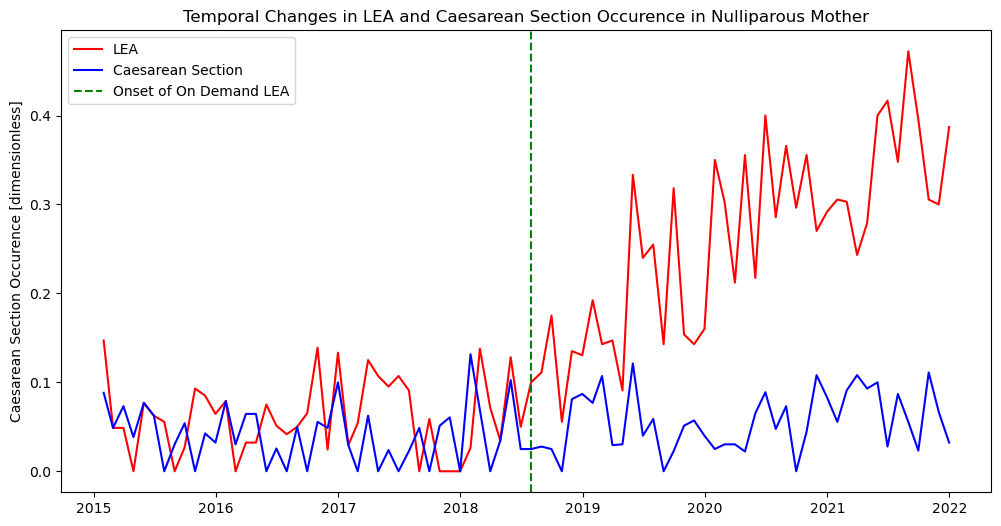

In [143]:
data_null = data[data['null']==1]

# Resample the data on a monthly basis and calculate the mean for numeric columns only
numeric_columns = ['duration', 'analgesia', 'mode_section']  # Specify the numeric columns relevant for resampling
monthly_means = data_null.set_index('delivery')[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
# Plot 'analgesia'
plt.plot(monthly_means.index, monthly_means['analgesia'], color='red', label='LEA')
# Plot 'ECS'
plt.plot(monthly_means.index, monthly_means['mode_section'], color='blue', label='Caesarean Section')
# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')  # Add vertical line

plt.xlabel('')
plt.ylabel('Caesarean Section Occurence [dimensionless]')
plt.title('Temporal Changes in LEA and Caesarean Section Occurence in Nulliparous Mother')
plt.legend()
plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\391338144.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = data_multi.set_index('delivery')[numeric_columns].resample('M').mean()


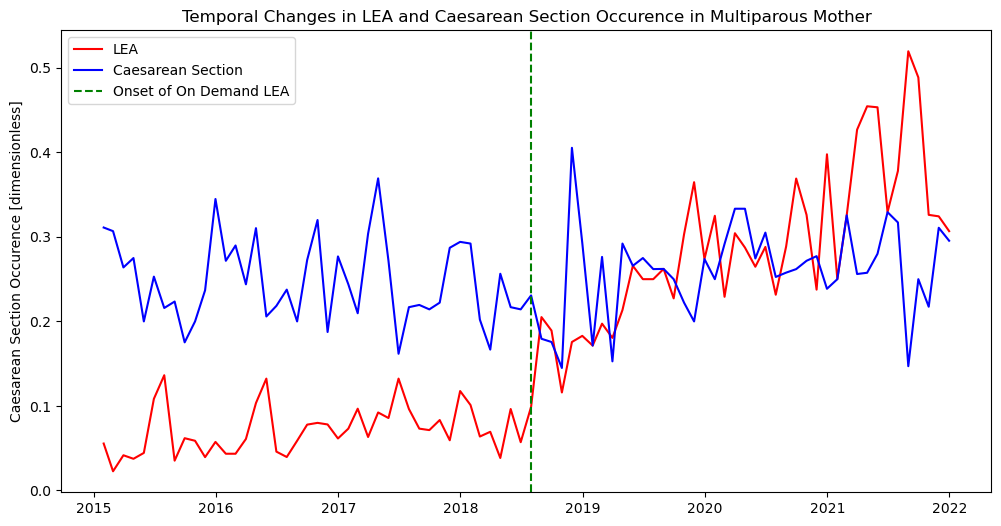

In [145]:
data_multi = data[data['null']==0]

# Resample the data on a monthly basis and calculate the mean for numeric columns only
numeric_columns = ['duration', 'analgesia', 'mode_section']  # Specify the numeric columns relevant for resampling
monthly_means = data_multi.set_index('delivery')[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
# Plot 'analgesia'
plt.plot(monthly_means.index, monthly_means['analgesia'], color='red', label='LEA')
# Plot 'ECS'
plt.plot(monthly_means.index, monthly_means['mode_section'], color='blue', label='Caesarean Section')
# ondemand開始の線を加える
plt.axvline(pd.Timestamp('2018-08-01'), color='green', linestyle='--', label='Onset of On Demand LEA')  # Add vertical line

plt.xlabel('')
plt.ylabel('Caesarean Section Occurence [dimensionless]')
plt.title('Temporal Changes in LEA and Caesarean Section Occurence in Multiparous Mother')
plt.legend()
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data.set_index('delivery_date', inplace=True)

# Define the periods
pre_period = (data.index >= '2018-08-01') & (data.index <= '2018-10-31')
post_period = (data.index >= '2021-08-01') & (data.index <= '2021-10-31')

# Update 'Period' column
data['Period'] = np.nan
data.loc[pre_period, 'Period'] = 'Pre'
data.loc[post_period, 'Period'] = 'Post'

# Remove rows outside of the pre and post periods
data_new = data.dropna(subset=['Period'])

# Regression model for DiD
data_new['Post'] = (data_new['Period'] == 'Post').astype(int)
data_new['Treatment'] = data_new['analgesia']
data_new['Interaction'] = data_new['Post'] * data_new['Treatment']

X = data_new[['Post', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
model = sm.OLS(data_new['mode_section'], X).fit()

# Extract the coefficient and its confidence interval for the interaction term
DiD = model.params['Interaction']
confidence_interval = model.conf_int().loc['Interaction']

# Extract p-value for the interaction term
p_value = model.pvalues['Interaction']

# Pivot the data for plotting
df_DiD = data_new.groupby(['Period', 'analgesia'])['mode_section'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECS proportions for LEA=1 and LEA=0
df_DiD[[0, 1]].loc[['Pre', 'Post']].plot(kind='bar', ax=ax)  # This line was modified to reverse the order.

# Add a line for the difference in differences
ax.hlines(DiD, xmin=0.8, xmax=1.2, linestyles='dashed', colors='red')

# Add text for the DiD, its confidence interval, and p-value
ax.text(1, DiD, f'DiD: {DiD:.3f}\nCI: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})\nP-value: {p_value:.3f}', va='bottom', ha='center')

# Add labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Caesarean section ratio [dimensionless]')
ax.set_title('Difference in Differences Analysis of Caesarean Section Ratio Between Cradle and Mature Period')

plt.show()

# ↑導入直後の3か月と最近の3か月

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data.set_index('delivery_date', inplace=True)

# Define the periods
pre_period = (data.index >= '2018-08-01') & (data.index <= '2018-10-31')
post_period = (data.index >= '2021-08-01') & (data.index <= '2021-10-31')

# Update 'Period' column
data['Period'] = np.nan
data.loc[pre_period, 'Period'] = 'Cradle Period'
data.loc[post_period, 'Period'] = 'Mature Period'

# Remove rows outside of the pre and post periods
data_new = data.dropna(subset=['Period'])

# Regression model for DiD
data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
data_new['Treatment'] = data_new['analgesia']
data_new['Interaction'] = data_new['Post'] * data_new['Treatment']

X = data_new[['Post', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
model = sm.OLS(data_new['mode_section'], X).fit()

# Extract the coefficient and its confidence interval for the interaction term
DiD = model.params['Interaction']
confidence_interval = model.conf_int().loc['Interaction']

# Extract p-value for the interaction term
p_value = model.pvalues['Interaction']

# Pivot the data for plotting
df_DiD = data_new.groupby(['Period', 'analgesia'])['mode_section'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECS proportions for LEA=1 and LEA=0, using custom labels for legend
colors = ['blue', 'orange']  # Assigning colors explicitly
df_DiD.plot(kind='bar', ax=ax, color=colors)

# Add a line for the difference in differences
ax.hlines(DiD, xmin=0.8, xmax=1.2, linestyles='dashed', colors='red')

# Add text for the DiD, its confidence interval, and p-value
ax.text(1, DiD, f'DiD: {DiD:.3f}\nCI: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})\nP-value: {p_value:.3f}', va='bottom', ha='center')

# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('Caesarean section ratio [dimensionless]')
ax.set_title('Difference in Differences Analysis of Caesarean Section Ratio Between Cradle and Mature Period')

# Rotate xtick labels and set legend with correct labels and colors
ax.set_xticklabels(['Cradle Period', 'Mature Period'], rotation=0)
plt.legend(['non-LEA', 'LEA'], title=None)
plt.tight_layout()
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data.set_index('delivery_date', inplace=True)

# Define the periods
pre_period = (data.index >= '2018-08-01') & (data.index <= '2018-10-31')
post_period = (data.index >= '2021-08-01') & (data.index <= '2021-10-31')

# Update 'Period' column
data['Period'] = np.nan
data.loc[pre_period, 'Period'] = 'Cradle Period'
data.loc[post_period, 'Period'] = 'Mature Period'

# Remove rows outside of the pre and post periods
data_new = data.dropna(subset=['Period'])

# Regression model for DiD
data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
data_new['Treatment'] = data_new['analgesia']
data_new['Interaction'] = data_new['Post'] * data_new['Treatment']

X = data_new[['Post', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
model = sm.OLS(data_new['mode_section'], X).fit()

# Extract the coefficient and its confidence interval for the interaction term
DiD = model.params['Interaction']
confidence_interval = model.conf_int().loc['Interaction']

# Extract p-value for the interaction term
p_value = model.pvalues['Interaction']

# Pivot the data for plotting
df_DiD = data_new.groupby(['Period', 'analgesia'])['mode_section'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECS proportions for LEA=1 and LEA=0, using custom labels for legend
colors = ['blue', 'orange']  # Assigning colors explicitly
df_DiD.plot(kind='bar', ax=ax, color=colors)

# Add a line for the difference in differences
ax.hlines(DiD, xmin=0.8, xmax=1.2, linestyles='dashed', colors='red')

# Add text for the DiD, its confidence interval, and p-value
ax.text(1, DiD, f'DiD: {DiD:.3f}\nCI: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})\nP-value: {p_value:.3f}', va='bottom', ha='center')

# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('Caesarean section ratio [dimensionless]')
ax.set_title('Difference in Differences Analysis of Caesarean Section Ratio Between Cradle and Mature Period')

# Rotate xtick labels and set legend with correct labels and colors
ax.set_xticklabels(['Cradle Period', 'Mature Period'], rotation=0)
plt.legend(['non-LEA', 'LEA'], title="Legend")
plt.tight_layout()
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data.set_index('delivery_date', inplace=True)

# Define the periods
pre_period = (data.index >= '2018-08-01') & (data.index <= '2018-10-31')
post_period = (data.index >= '2021-08-01') & (data.index <= '2021-10-31')

# Update 'Period' column
data['Period'] = np.nan
data.loc[pre_period, 'Period'] = 'Cradle Period'
data.loc[post_period, 'Period'] = 'Mature Period'

# Remove rows outside of the pre and post periods
data_new = data.dropna(subset=['Period'])

# Regression model for DiD
data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
data_new['Treatment'] = data_new['analgesia']
data_new['Interaction'] = data_new['Post'] * data_new['Treatment']

X = data_new[['Post', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
model = sm.OLS(data_new['mode_section'], X).fit()

# Extract the coefficient and its confidence interval for the interaction term
DiD = model.params['Interaction']
confidence_interval = model.conf_int().loc['Interaction']

# Extract p-value for the interaction term
p_value = model.pvalues['Interaction']

# Pivot the data for plotting
df_DiD = data_new.groupby(['Period', 'analgesia'])['mode_section'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECS proportions for LEA=1 and LEA=0, using custom labels for legend
colors = ['blue', 'orange']  # Assigning colors explicitly
df_DiD.plot(kind='bar', ax=ax, color=colors)

# Add a line for the difference in differences with label set to underscore to exclude from legend
ax.hlines(DiD, xmin=0.8, xmax=1.2, linestyles='dashed', colors='red', label='_')

# Add text for the DiD, its confidence interval, and p-value
ax.text(1, DiD, f'DiD: {DiD:.3f}\nCI: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})\nP-value: {p_value:.3f}', va='bottom', ha='center')

# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('Caesarean section ratio [dimensionless]')
ax.set_title('Difference in Differences Analysis of Caesarean Section Ratio Between Cradle and Mature Period')

# Rotate xtick labels and set legend with correct labels and colors
ax.set_xticklabels(['Cradle Period', 'Mature Period'], rotation=0)
plt.legend(['non-LEA', 'LEA'], title=None)
plt.tight_layout()
plt.show()


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\4243601641.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cradle Period' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[pre_period, 'Period'] = 'Cradle Period'
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\4243601641.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\4243601641.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

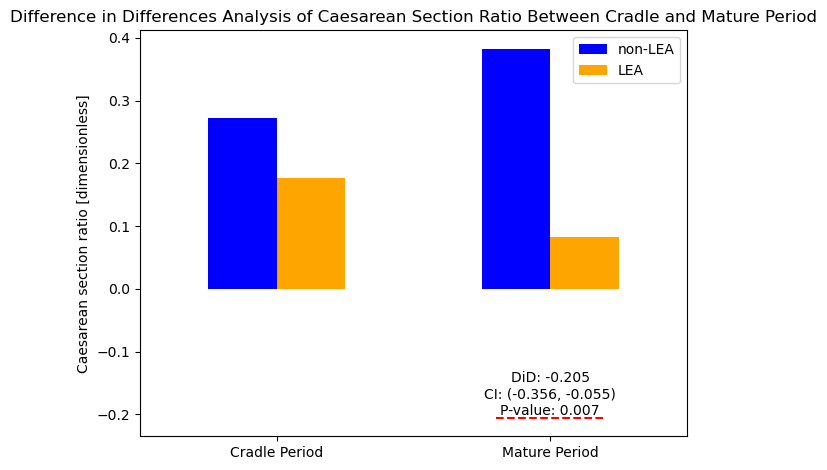

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データのロード
data = pd.read_excel('D:/from_689/adachi_concat.xlsx')
data.set_index('delivery_date', inplace=True)

# Define the periods
pre_period = (data.index >= '2018-08-01') & (data.index <= '2018-10-31')
post_period = (data.index >= '2021-08-01') & (data.index <= '2021-10-31')

# Update 'Period' column
data['Period'] = np.nan
data.loc[pre_period, 'Period'] = 'Cradle Period'
data.loc[post_period, 'Period'] = 'Mature Period'

# Remove rows outside of the pre and post periods
data_new = data.dropna(subset=['Period'])

# Regression model for DiD
data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
data_new['Treatment'] = data_new['analgesia']
data_new['Interaction'] = data_new['Post'] * data_new['Treatment']

X = data_new[['Post', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
model = sm.OLS(data_new['mode_section'], X).fit()

# Extract the coefficient and its confidence interval for the interaction term
DiD = model.params['Interaction']
confidence_interval = model.conf_int().loc['Interaction']

# Extract p-value for the interaction term
p_value = model.pvalues['Interaction']

# Pivot the data for plotting
df_DiD = data_new.groupby(['Period', 'analgesia'])['mode_section'].mean().unstack()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECS proportions for LEA=1 and LEA=0, using custom labels for legend
colors = ['blue', 'orange']  # Assigning colors explicitly
df_DiD.plot(kind='bar', ax=ax, color=colors)

# Add a line for the difference in differences, but exclude it from legend by not setting a label
ax.hlines(DiD, xmin=0.8, xmax=1.2, linestyles='dashed', colors='red')

# Add text for the DiD, its confidence interval, and p-value
ax.text(1, DiD, f'DiD: {DiD:.3f}\nCI: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})\nP-value: {p_value:.3f}', va='bottom', ha='center')

# Add labels and title
ax.set_xlabel('')
ax.set_xticklabels(['Cradle Period', 'Mature Period'], rotation=0)  # rotation=0 to make labels horizontal
ax.set_ylabel('Caesarean section ratio [dimensionless]')
ax.set_title('Difference in Differences Analysis of Caesarean Section Ratio Between Cradle and Mature Period')

# Manage legend: explicitly define which elements to include
handles, labels = ax.get_legend_handles_labels()
# Include only the first two elements which correspond to the bar plots
plt.legend(handles[:2], ['non-LEA', 'LEA'], title=None)
plt.tight_layout()
plt.show()


C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\778303278.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cradle Period' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[pre_period, 'Period'] = 'Cradle Period'
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\778303278.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Post'] = (data_new['Period'] == 'Mature Period').astype(int)
C:\Users\bougt\AppData\Local\Temp\ipykernel_33244\778303278.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

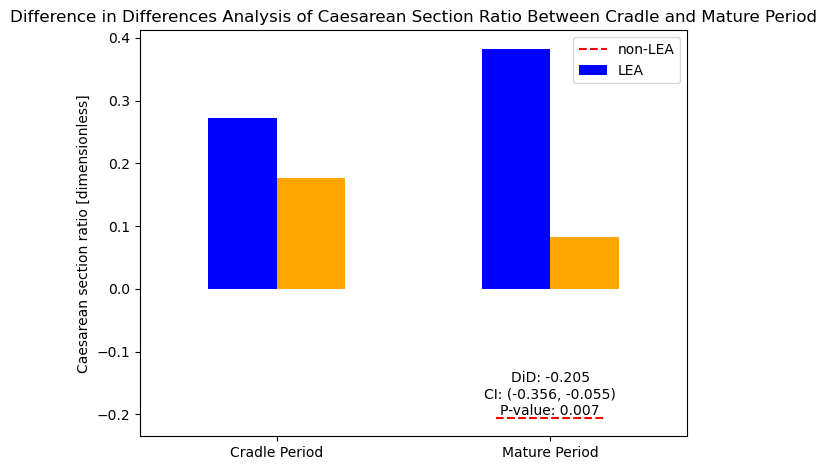